## Imports

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from smote import smote_sampling
from train_and_pred import train_and_predict
from model_evaluation import calculate_metrics, stratified_cv, roc_plot
from fraud_distribution import fraud_distr 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score 


## Data Import and Cleaning

In [29]:
# read in data
data = pd.read_csv('dataset.csv')

# check for nulls
# print(data.isnull().values.any())
# No nulls

# obtain X and y
X = data[["Time", "Amount", "V1", "V2"]]
y = data['Class']

# find fraud distribution
fraud_count, fraud_percentage_rounded = fraud_distr(y)

# print fraud distribution
print('There are ' + str(fraud_count) + ' fraudulent transactions- about ' + str(fraud_percentage_rounded) + ' percent of the dataset.')

There are 492 fraudulent transactions- about 0.1727 percent of the dataset.


## Create Training Sets

In [30]:
# Scale non-pc data before splitting
scaler = StandardScaler()
X_scaled = X.copy() 
X_scaled[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

# Split scaled data into training set(80%) and test set(20%) using stratified splitting
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=7)

# apply SMOTE to scaled training data- have new minority class be about 30 percent of the majority class
X_train_scaled_sampled, y_train_sampled = smote_sampling(X_train_scaled, y_train, sample_proportion=0.3)

# find new fraud proportion
fraud_count_new, fraud_percentage_rounded_new = fraud_distr(y_train_sampled)

# print new fraud distribution
print('There are ' + str(fraud_count_new) + ' fraudulent transactions in the first SMOTE training set- about ' + str(fraud_percentage_rounded_new) + ' percent of the training data.')


# apply SMOTE to scaled training data again- have new minority class be about 70 percent of the majority class
X_train_scaled_sampled2, y_train_sampled2 = smote_sampling(X_train_scaled, y_train, sample_proportion=0.7)

# find new fraud proportion
fraud_count_new2, fraud_percentage_rounded_new2 = fraud_distr(y_train_sampled2)

# print new fraud distribution
print('There are ' + str(fraud_count_new2) + ' fraudulent transactions in the second SMOTE training set- about ' + str(fraud_percentage_rounded_new2) + ' percent of the training data.')

There are 68235 fraudulent transactions in the first SMOTE training set- about 23.0768 percent of the training data.
There are 159215 fraudulent transactions in the second SMOTE training set- about 41.1764 percent of the training data.


## Logistic Regression

#### Original training set LR evaluation

{'accuracy': 0.9984375548611355, 'precision': 0.8461538461538461, 'recall': 0.11224489795918367, 'f1 score': 0.1981981981981982}
auc of base lr: 0.8595164043388881
Average Logistic Regression CV Accuracy: 0.9983602931846207


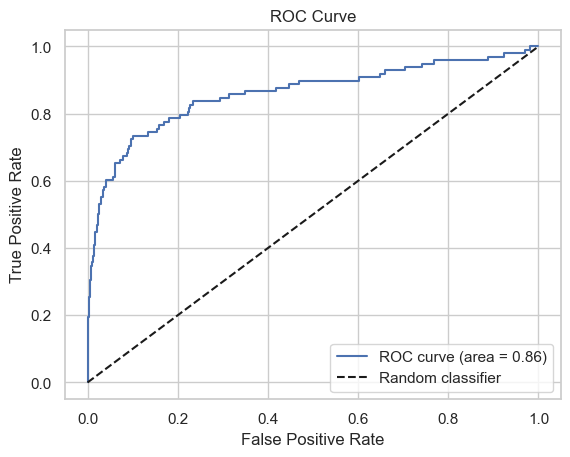

In [31]:
# Initialize base model
lr = LogisticRegression(random_state=22)

# Fit model and get predictions
y_pred_prob_lr, y_pred_lr = train_and_predict(lr, X_train_scaled, y_train, X_test_scaled)

# Get accuracy metrics
lr_metrics = calculate_metrics(y_test, y_pred_lr)
print(lr_metrics)
lr_auc = roc_auc_score(y_test, y_pred_prob_lr)
print('auc of base lr: '+ str(lr_auc))

# Get CV accuracy for lr
avg_lr_cv_accuracy = stratified_cv(lr, X_scaled, y, num_splits=5)
print('Average Logistic Regression CV Accuracy: ' + str(avg_lr_cv_accuracy))

# Plot auc
roc_plot(y_test, y_pred_prob_lr, lr_auc)

#### First SMOTE training set LR evaluation

{'accuracy': 0.9705066535585127, 'precision': 0.029166666666666667, 'recall': 0.5, 'f1 score': 0.05511811023622047}
auc of first SMOTE lr: 0.8821502503646365


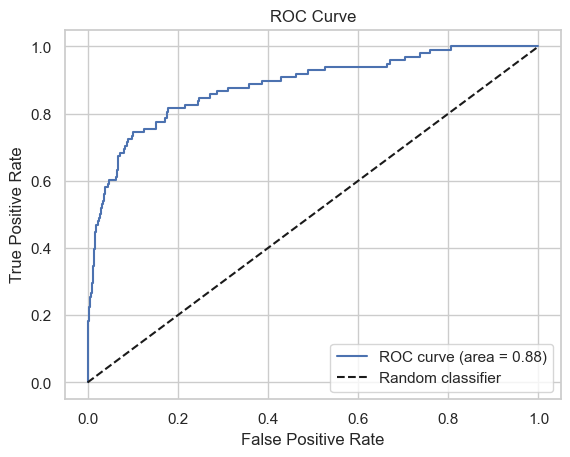

In [32]:
# Fit first SMOTE model and get predictions
y_pred_prob_lr2, y_pred_lr2 = train_and_predict(lr, X_train_scaled_sampled, y_train_sampled, X_test_scaled)

# Get accuracy metrics
lr_metrics2 = calculate_metrics(y_test, y_pred_lr2)
print(lr_metrics2)
lr_auc2 = roc_auc_score(y_test, y_pred_prob_lr2)
print('auc of first SMOTE lr: '+ str(lr_auc2))

# Plot auc
roc_plot(y_test, y_pred_prob_lr2, lr_auc2)

#### Second SMOTE training set LR evaluation

{'accuracy': 0.9322179698746533, 'precision': 0.017192712342827817, 'recall': 0.6836734693877551, 'f1 score': 0.033541927409261575}
auc of second SMOTE lr: 0.8825213470306524


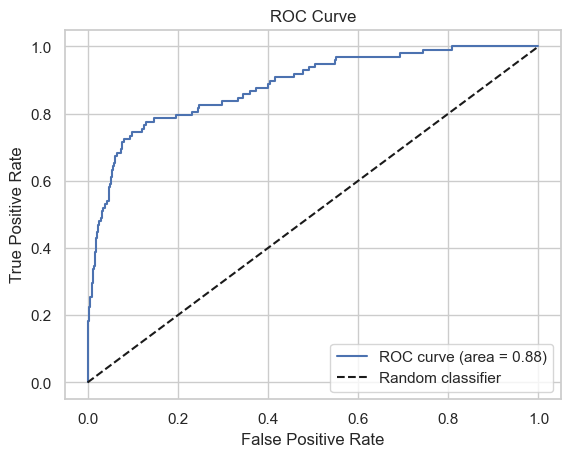

In [33]:
# Fit second SMOTE model and get predictions
y_pred_prob_lr3, y_pred_lr3 = train_and_predict(lr, X_train_scaled_sampled2, y_train_sampled2, X_test_scaled)

# Get accuracy metrics
lr_metrics3 = calculate_metrics(y_test, y_pred_lr3)
print(lr_metrics3)
lr_auc3 = roc_auc_score(y_test, y_pred_prob_lr3)
print('auc of second SMOTE lr: '+ str(lr_auc3))

# Plot auc
roc_plot(y_test, y_pred_prob_lr3, lr_auc3)

## Random Forest

#### Original training set RF evaluation

{'accuracy': 0.9986482216214319, 'precision': 0.8, 'recall': 0.2857142857142857, 'f1 score': 0.4210526315789473}
auc of base rf: 0.8485587344814122
Average Random Forest CV Accuracy: 0.9986833186940812


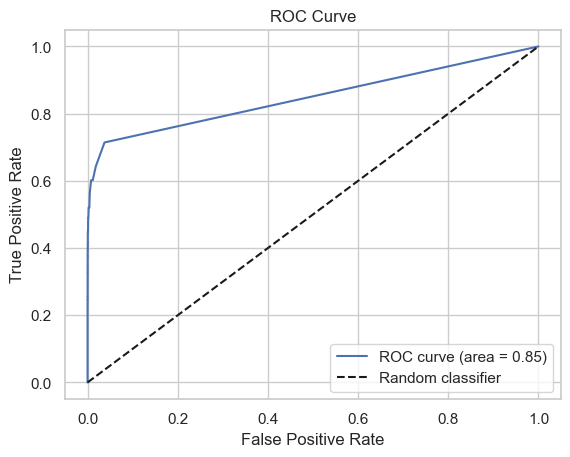

In [34]:
# Initialize base model
rf = RandomForestClassifier(random_state=22)

# Fit model and get predictions
y_pred_prob_rf, y_pred_rf = train_and_predict(rf, X_train_scaled, y_train, X_test_scaled)

# Get accuracy metrics
rf_metrics = calculate_metrics(y_test, y_pred_rf)
print(rf_metrics)
rf_auc = roc_auc_score(y_test, y_pred_prob_rf)
print('auc of base rf: '+ str(rf_auc))

# Get CV accuracy for rf
avg_rf_cv_accuracy = stratified_cv(rf, X_scaled, y, num_splits=5)
print('Average Random Forest CV Accuracy: ' + str(avg_rf_cv_accuracy))

# Plot auc
roc_plot(y_test, y_pred_prob_rf, rf_auc)

#### First SMOTE training set RF evaluation

{'accuracy': 0.9938906639514062, 'precision': 0.13450292397660818, 'recall': 0.46938775510204084, 'f1 score': 0.20909090909090908}
auc of first SMOTE rf: 0.864505303739391


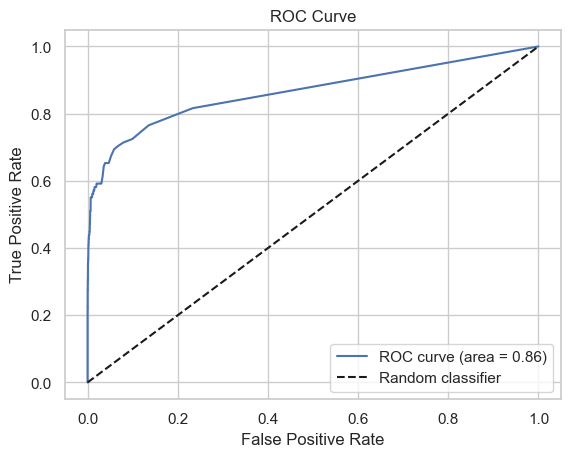

In [35]:
# Fit first SMOTE model and get predictions
y_pred_prob_rf2, y_pred_rf2 = train_and_predict(rf, X_train_scaled_sampled, y_train_sampled, X_test_scaled)

# Get accuracy metrics
rf_metrics2 = calculate_metrics(y_test, y_pred_rf2)
print(rf_metrics2)
rf_auc2 = roc_auc_score(y_test, y_pred_prob_rf2)
print('auc of first SMOTE rf: '+ str(rf_auc2))

# Plot auc
roc_plot(y_test, y_pred_prob_rf2, rf_auc2)

#### Second SMOTE training set RF evaluation

{'accuracy': 0.9926617745163442, 'precision': 0.11352657004830918, 'recall': 0.47959183673469385, 'f1 score': 0.18359374999999997}
auc of second SMOTE rf: 0.8995789631975468


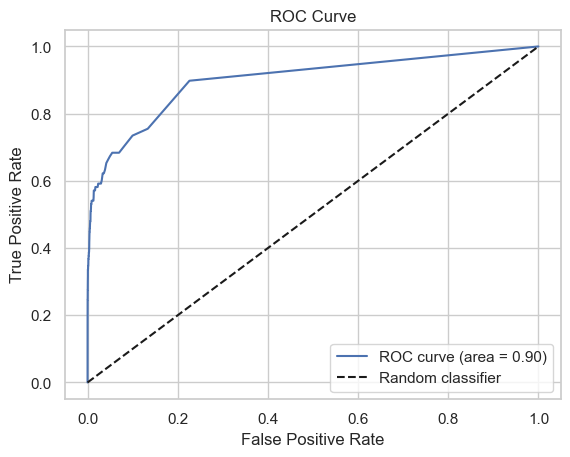

In [36]:
# Fit second SMOTE model and get predictions
y_pred_prob_rf3, y_pred_rf3 = train_and_predict(rf, X_train_scaled_sampled2, y_train_sampled2, X_test_scaled)

# Get accuracy metrics
rf_metrics3 = calculate_metrics(y_test, y_pred_rf3)
print(rf_metrics3)
rf_auc3 = roc_auc_score(y_test, y_pred_prob_rf3)
print('auc of second SMOTE rf: '+ str(rf_auc3))

# Plot auc
roc_plot(y_test, y_pred_prob_rf3, rf_auc3)

## Gradient Boosting

#### Original training set GB evaluation

{'accuracy': 0.9982093325374811, 'precision': 0.46, 'recall': 0.23469387755102042, 'f1 score': 0.3108108108108108}
auc of base gb: 0.9116783654232656
Average Gradient Boosting CV Accuracy: 0.9982128248497565


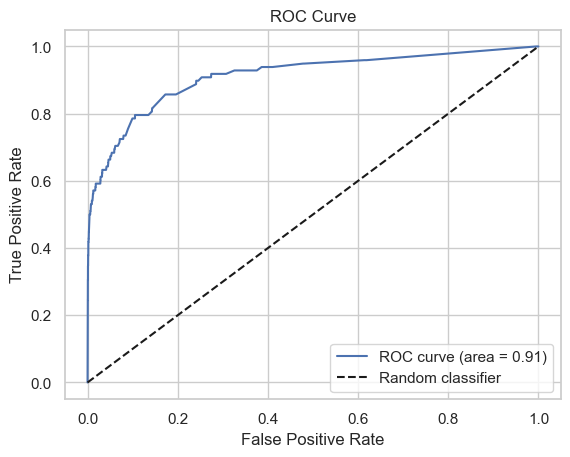

In [37]:
# Initialize base model
gb = GradientBoostingClassifier(random_state=22)

# Fit model and get predictions
y_pred_prob_gb, y_pred_gb = train_and_predict(gb, X_train_scaled, y_train, X_test_scaled)

# Get accuracy metrics
gb_metrics = calculate_metrics(y_test, y_pred_gb)
print(gb_metrics)
gb_auc = roc_auc_score(y_test, y_pred_prob_gb)
print('auc of base gb: '+ str(gb_auc))

# Get CV accuracy for rf
avg_gb_cv_accuracy = stratified_cv(gb, X_scaled, y, num_splits=5)
print('Average Gradient Boosting CV Accuracy: ' + str(avg_gb_cv_accuracy))

# Plot auc
roc_plot(y_test, y_pred_prob_gb, gb_auc)

#### First SMOTE training set GB evaluation

{'accuracy': 0.9641866507496225, 'precision': 0.03362151777137368, 'recall': 0.7142857142857143, 'f1 score': 0.06422018348623854}
auc of first SMOTE gb: 0.9265999326714366


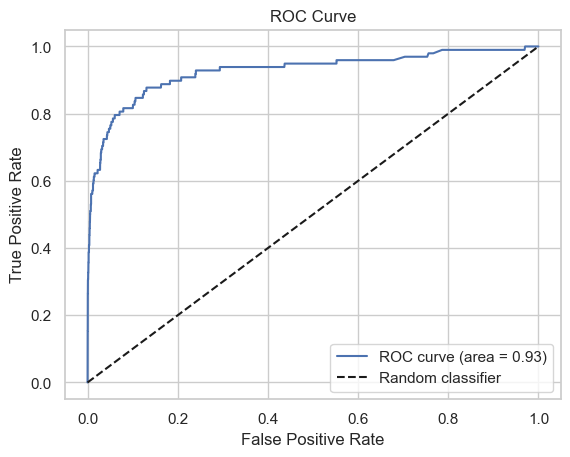

In [38]:
# Fit first SMOTE model and get predictions
y_pred_prob_gb2, y_pred_gb2 = train_and_predict(gb, X_train_scaled_sampled, y_train_sampled, X_test_scaled)

# Get accuracy metrics
gb_metrics2 = calculate_metrics(y_test, y_pred_gb2)
print(gb_metrics2)
gb_auc2 = roc_auc_score(y_test, y_pred_prob_gb2)
print('auc of first SMOTE gb: '+ str(gb_auc2))

# Plot auc
roc_plot(y_test, y_pred_prob_gb2, gb_auc2)

#### Second SMOTE training set GB evaluation

{'accuracy': 0.9393104174712966, 'precision': 0.022190611664295874, 'recall': 0.7959183673469388, 'f1 score': 0.04317741489067257}
auc of second SMOTE gb: 0.9232741492770433


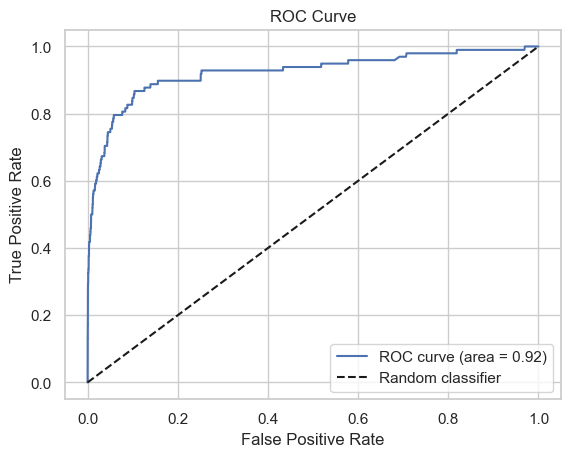

In [39]:
# Fit second SMOTE model and get predictions
y_pred_prob_gb3, y_pred_gb3 = train_and_predict(gb, X_train_scaled_sampled2, y_train_sampled2, X_test_scaled)

# Get accuracy metrics
gb_metrics3 = calculate_metrics(y_test, y_pred_gb3)
print(gb_metrics3)
gb_auc3 = roc_auc_score(y_test, y_pred_prob_gb3)
print('auc of second SMOTE gb: '+ str(gb_auc3))

# Plot aucwhi
roc_plot(y_test, y_pred_prob_gb3, gb_auc3)

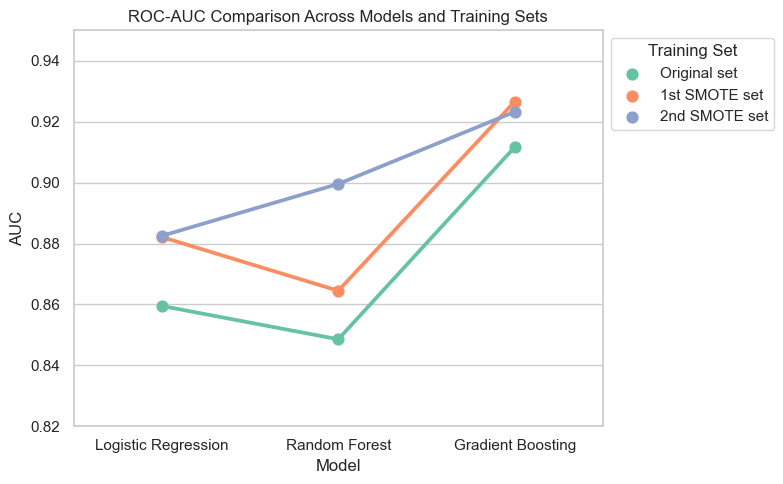

In [40]:
# store auc values in an array,labeled with model type and corresponding training set
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
training_sets = ['Original set', '1st SMOTE set', '2nd SMOTE set']
auc_values = np.array([
    [lr_auc, lr_auc2, lr_auc3],  # lr
    [rf_auc, rf_auc2, rf_auc3],  # rf
    [gb_auc, gb_auc2, gb_auc3]   # gb
])

# Convert auc_values into a df
plot_data = []
for i, model in enumerate(models):
    for j, training_set in enumerate(training_sets):
        plot_data.append([model, training_set, auc_values[i, j]])
plot_df = pd.DataFrame(plot_data, columns=['Model', 'Training Set', 'AUC'])


# Create plot 
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.pointplot(data=plot_df, x="Model", y="AUC", hue="Training Set", palette="Set2")
plt.title("ROC-AUC Comparison Across Models and Training Sets")
plt.ylim(0.82, 0.95)
plt.legend(title="Training Set", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()